In [13]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from urllib.parse import quote
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [14]:
# Carga do dataset
uci_url = 'https://archive.ics.uci.edu/static/public/697/'
predict_student_file = 'predict+students+dropout+and+academic+success.zip'
request = urllib.request.urlopen(uci_url + urllib.parse.quote(predict_student_file))
zipfile = ZipFile(BytesIO(request.read()))
filepath = TextIOWrapper(zipfile.open('data.csv'), encoding='utf-8')
dataset = pd.read_csv(filepath, sep=';')

dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [15]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:36]
y = array[:,36]

In [16]:
# Seleção de atributos usando Seleção Univariada

# Calculando o melhor k
f1_score_list = []

model_LR = LogisticRegression(max_iter=200)

for k in range(1, 37):
    # Seleção de atributos com SelectKBest
    kbest_var = SelectKBest(score_func=f_classif, k=k)

    # Executa a função de pontuação e obtém os atributos selecionados
    kbest_var.fit(X, y)

    # Reduz X para os atributos selecionados
    features = kbest_var.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

    model_LR.fit(X_train, y_train)
    kbest_pred = model_LR.predict(X_test)    

    f1_score_kbest = round(f1_score(y_test, kbest_pred, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

# O melhor k selecionado
kbest = f1_score_list.index(max(f1_score_list)) + 1

# Seleção de atributos com o melhor k
kbest_var = SelectKBest(score_func=f_classif, k=kbest)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = kbest_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset.columns[0:36])

# Exibe as pontuações de cada atributo e os escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) 
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", kbest_var.get_feature_names_out(input_features=dataset.columns[0:36]))

X = features


Número original de atributos: 36

Número reduzido de atributos: 15

Atributos Originais: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem 

In [17]:
# Criando os folds para a validação cruzada
num_splits = 10
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

KNN: 0.680856 (0.027867)
CART: 0.682479 (0.025217)
NB: 0.715411 (0.033750)
SVM: 0.680528 (0.030234)
LR: 0.761617 (0.026800)
Bagging: 0.749972 (0.025425)
RF: 0.759993 (0.023443)
ET: 0.754173 (0.027037)
Ada: 0.754489 (0.032907)
GB: 0.760317 (0.020671)
Voting: 0.749342 (0.030209)


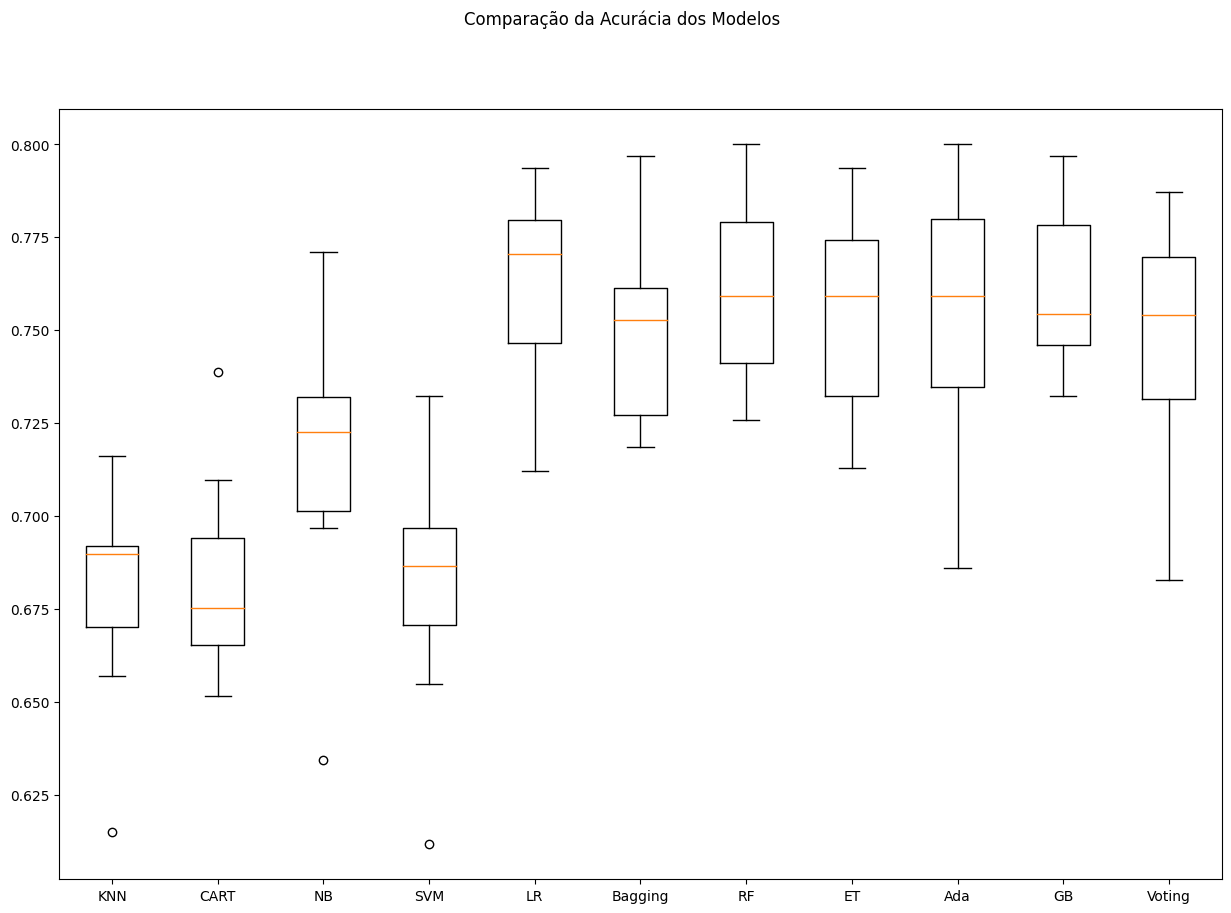

In [18]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(42)

# Divindindo o dataset em subconjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

# Listas para aramazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=200)))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('Logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

LR-orig: 0.761617 (0.026800)
RF-orig: 0.756764 (0.021438)
GB-orig: 0.760317 (0.020671)
LR-padr: 0.760644 (0.027319)
RF-padr: 0.759667 (0.030090)
GB-padr: 0.759995 (0.020323)
LR-norm: 0.754172 (0.030940)
RF-norm: 0.761288 (0.023152)
GB-norm: 0.760317 (0.020671)


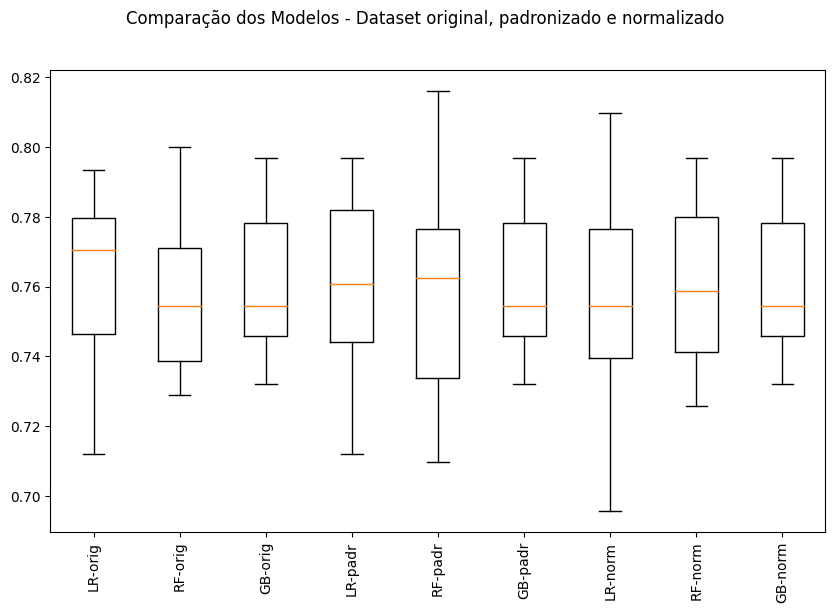

In [30]:
# Montando os pipelines

# Lista para armazenar os pipelines
pipelines = []

# Listas para aramazenar os resultados e os nomes dos modelos
results = []
names = []

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))

# Dataset padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))

# Dataset normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos selecionados
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [24]:
# tuning da Regressão Logistica

pipelines_reg_log = []

# definindo os componentes do pipeline
pipelines_reg_log.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines_reg_log.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines_reg_log.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))

'''
param_grid= {
    'LR__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'LR__C' : np.logspace(-4, 4, 20),
    'LR__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'LR__max_iter' : [100, 1000,2500, 5000]
}
'''
param_grid= {
    'LR__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'LR__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
}

# prepara e executa o GridSearchCV
for name, model in pipelines_reg_log:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: LR-orig - Melhor: 0.761617 usando {'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Sem tratamento de missings: LR-padr - Melhor: 0.760644 usando {'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Sem tratamento de missings: LR-norm - Melhor: 0.760320 usando {'LR__penalty': 'none', 'LR__solver': 'newton-cg'}


In [27]:
# Tuning do Random Forest

pipelines_random_forest = []

# Definindo os componentes do pipeline
pipelines_random_forest.append(('RF-orig', Pipeline(steps=[random_forest])))
pipelines_random_forest.append(('RF-padr', Pipeline(steps=[standard_scaler, random_forest])))
pipelines_random_forest.append(('RF-norm', Pipeline(steps=[min_max_scaler, random_forest])))

param_grid = [{
    'RF__n_estimators':[10,100,200],
    'RF__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_random_forest:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: RF-orig - Melhor: 0.760638 usando {'RF__max_features': 1, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-padr - Melhor: 0.761620 usando {'RF__max_features': 1, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-norm - Melhor: 0.760316 usando {'RF__max_features': 1, 'RF__n_estimators': 100}


In [28]:
# Tuning do Gradient Boosting

pipelines_gradient_boosting = []

# Definindo os componentes do pipeline
pipelines_gradient_boosting.append(('GB-orig', Pipeline(steps=[gradient_boosting])))
pipelines_gradient_boosting.append(('GB-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines_gradient_boosting.append(('GB-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))

param_grid = [{
    'GB__n_estimators':[10,100,200],
    'GB__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_gradient_boosting:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: GB-orig - Melhor: 0.763867 usando {'GB__max_features': 3, 'GB__n_estimators': 200}
Sem tratamento de missings: GB-padr - Melhor: 0.760635 usando {'GB__max_features': 3, 'GB__n_estimators': 200}
Sem tratamento de missings: GB-norm - Melhor: 0.764193 usando {'GB__max_features': 1, 'GB__n_estimators': 200}


In [33]:
# avaliação do modelo com o conjunto de testes

# preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=200, max_features=1))
model = Pipeline([min_max_scaler, gradient_boosting])

model.fit(rescaledX, y_train)

# estimativa da acurácia no conjunto de teste
rescaledTextX = scaler.transform(X_test)
predictions = model.predict(rescaledTextX)
print(accuracy_score(y_test, predictions))

0.7718373493975904


In [35]:
# preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('GB',
                 GradientBoostingClassifier(max_features=1, n_estimators=200))])

In [36]:
# novos dados - não sabemos a classe
data = {
"Marital status": [1],
"Application mode": [17],
"Application order": [5],
"Course": [171],
"Daytime/evening attendance": [1],
"Previous qualification": [1],
"Previous qualification (grade)": [122.0],
"Nacionality": [1],
"Mother's qualification": [19],
"Father's qualification": [12],
"Mother's occupation": [5],
"Father's occupation": [9],
"Admission grade": [127.3],
"Displaced": [1],
"Educational special needs": [0],
"Debtor": [0],
"Tuition fees up to date": [1],
"Gender": [1],
"Scholarship holder": [0],
"Age at enrollment": [20],
"International": [0],
"Curricular units 1st sem (credited)": [0],
"Curricular units 1st sem (enrolled)": [0],
"Curricular units 1st sem (evaluations)": [0],
"Curricular units 1st sem (approved)": [0],
"Curricular units 1st sem (grade)": [0.0],
"Curricular units 1st sem (without evaluations)":[0],
"Curricular units 2nd sem (credited)": [0],
"Curricular units 2nd sem (enrolled)": [0],
"Curricular units 2nd sem (evaluations)": [0],
"Curricular units 2nd sem (approved)": [0],
"Curricular units 2nd sem (grade)": [0.0],
"Curricular units 2nd sem (without evaluations)": [0],
"Unemployment rate": [10.8],
"Inflation rate": [1.4],
"GDP": [1.74],
}

atributos = ["Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Previous qualification (grade)","Nacionality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Admission grade","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP"]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:36].astype(float)

# padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

ValueError: X has 36 features, but StandardScaler is expecting 15 features as input.

In [ ]:
# predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

['Dropout']
